In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [89]:
y = pd.read_csv('AAPL_quarterly_financials.csv')

In [90]:
y.index = y.name

In [91]:
y = pd.DataFrame(y.loc['BasicEPS', :]).iloc[2: , :]

In [92]:
y.index = pd.to_datetime(y.index)

In [93]:
y = y.sort_index().fillna(0.)

In [113]:
y = y[y.index >= '2004-01-01']
y

,BasicEPS
2004-03-31,0.002
2004-06-30,0.003
2004-09-30,0.0
2004-12-31,0.013
2005-03-31,0.013
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [114]:
from pytrends.request import TrendReq

In [115]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession", "Huawei", "Interest Rates", "Buy iPhone", "Sell iPhone", "TSMC", "Samsung", "iPhone Price", "Iron Man", "UCLA", "Golden State Warriors"]  
# Add your keywords here
start_date = '2004-01-01'
end_date = '2023-09-30'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [123]:
df = df.resample('Q').mean()

# 3.) Normalize all the X data

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()

In [126]:
X_scaled = scaler.fit_transform(df)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [127]:
from sklearn.linear_model import Lasso

In [151]:
lasso = Lasso(alpha = 0.02)

In [152]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.02)

In [153]:
coefficients = lasso.coef_

<function matplotlib.pyplot.show(close=None, block=None)>

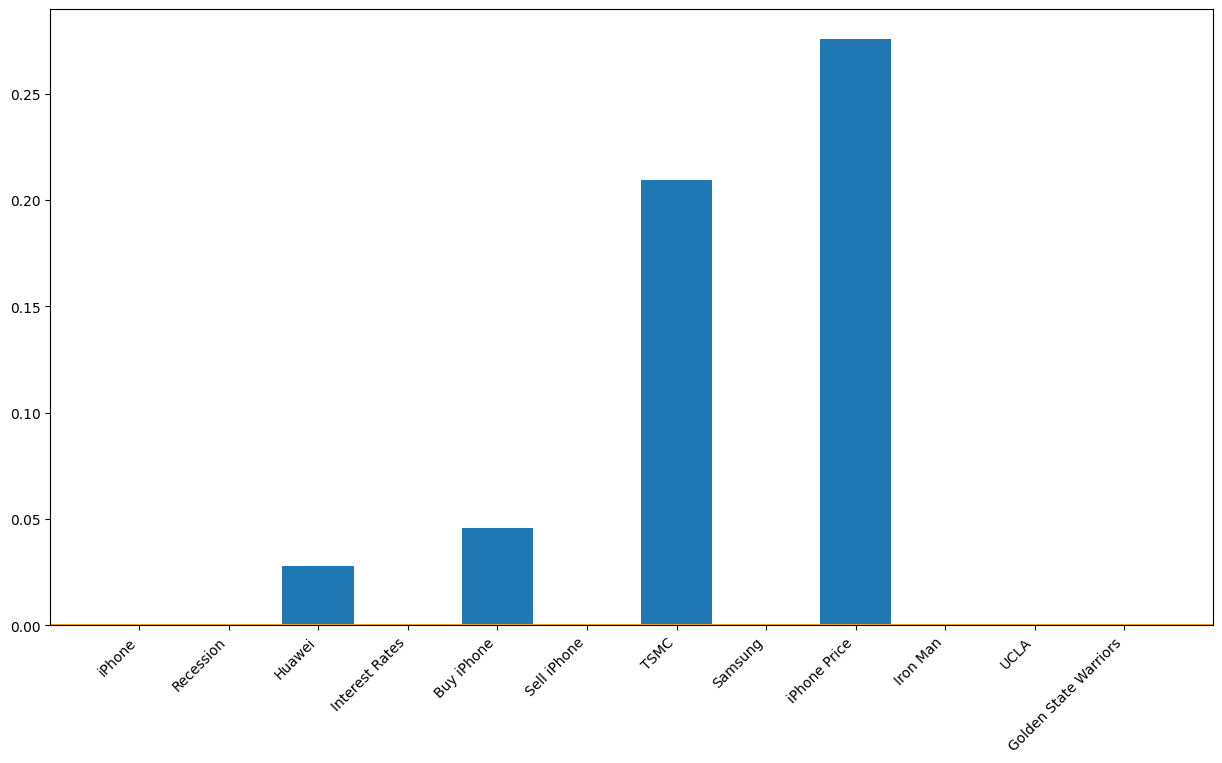

In [155]:
plt.figure(figsize = (15, 8))
plt.bar(range(len(coefficients)), coefficients, tick_label = df.columns)
plt.xticks(range(len(coefficients)), df.columns, rotation=45, ha='right')
plt.axhline(0, color = 'orange')
plt.show

# 5.) Do these coefficient magnitudes make sense?

Yes, I think they make sense. For the most significant indicator 'iPhone Price', it has the strongest explanatory power and punishing other similar indicators to 0. "TSMC" is a major supplier for microchips used in iPhone, so this also should relate to Apple's EPS intuitively. Overall, reasonable indicators have been saved while unrelated or redundant indicators are removed.